In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv("/content/imdb_top_1000.csv")
df.head()

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,https://m.media-amazon.com/images/M/MV5BMDFkYT...,The Shawshank Redemption,1994,A,142 min,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,"28,341,469"
1,https://m.media-amazon.com/images/M/MV5BM2MyNj...,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"
2,https://m.media-amazon.com/images/M/MV5BMTMxNT...,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444"
3,https://m.media-amazon.com/images/M/MV5BMWMwMG...,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,"57,300,000"
4,https://m.media-amazon.com/images/M/MV5BMWU4N2...,12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,"4,360,000"


In [9]:
# Cleaning
# Fix release year
df['Released_Year'] = df['Released_Year'].astype(str).str.extract(r'(\d{4})').astype(float)

# Extract runtime minutes
df['Runtime_min'] = df['Runtime'].str.extract(r'(\d+)').astype(float)

# Clean genre column (explode later)
df['Genre'] = df['Genre'].astype(str)

In [10]:
df.head()

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross,Runtime_min
0,https://m.media-amazon.com/images/M/MV5BMDFkYT...,The Shawshank Redemption,1994.0,A,142 min,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,"28,341,469",142.0
1,https://m.media-amazon.com/images/M/MV5BM2MyNj...,The Godfather,1972.0,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411",175.0
2,https://m.media-amazon.com/images/M/MV5BMTMxNT...,The Dark Knight,2008.0,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444",152.0
3,https://m.media-amazon.com/images/M/MV5BMWMwMG...,The Godfather: Part II,1974.0,A,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,"57,300,000",202.0
4,https://m.media-amazon.com/images/M/MV5BMWU4N2...,12 Angry Men,1957.0,U,96 min,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,"4,360,000",96.0


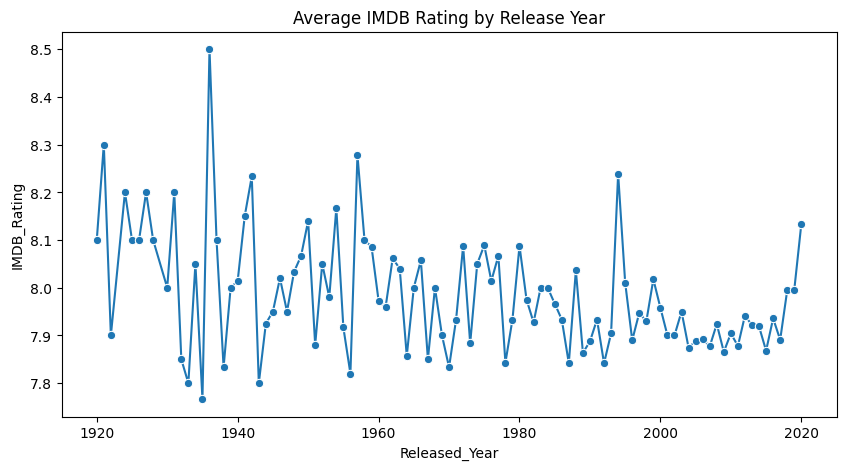

In [11]:
# Analysis Ratings vs Year
ratings_by_year = df.groupby('Released_Year')['IMDB_Rating'].mean().reset_index()

plt.figure(figsize=(10,5))
sns.lineplot(data=ratings_by_year, x='Released_Year', y='IMDB_Rating', marker='o')
plt.title("Average IMDB Rating by Release Year")
plt.show()

/tmp/ipython-input-3974983878.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top, x="mean", y="Director", palette="Blues_r")


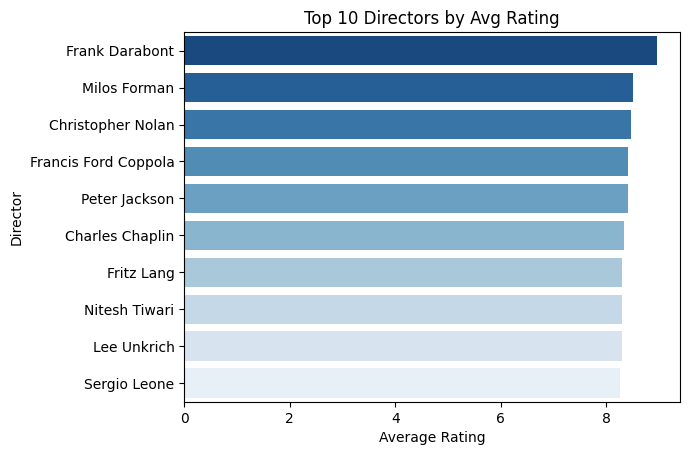

In [12]:
# Top 10 Directors by Avg Rating
top = (df.groupby("Director")["IMDB_Rating"]
         .agg(["mean","count"])
         .query("count>=2")
         .sort_values("mean", ascending=False)
         .head(10)
         .reset_index())

sns.barplot(data=top, x="mean", y="Director", palette="Blues_r")
plt.title("Top 10 Directors by Avg Rating")
plt.xlabel("Average Rating")
plt.show()


/tmp/ipython-input-3985658602.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_genres.values, y=top_genres.index, palette="Greens_r")


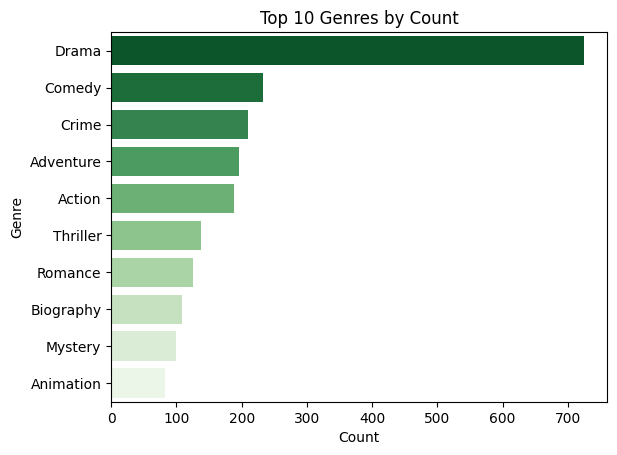

In [13]:
#Analysis 3: Genre Insights
top_genres = (
    df['Genre'].str.split(',')
      .explode().str.strip()
      .value_counts()
      .head(10)
)

sns.barplot(x=top_genres.values, y=top_genres.index, palette="Greens_r")
plt.title("Top 10 Genres by Count")
plt.xlabel("Count")
plt.show()


In [14]:
#  Save cleaned dataset for Power BI
df.to_csv("imdb_clean.csv", index=False)

print("Cleaned dataset saved as 'imdb_clean.csv'")


Cleaned dataset saved as 'imdb_clean.csv'
